## Portfolio Optimization
* http://quantsoftware.gatech.edu/Optimize_something
* Find optimal allocations for a given set of stocks

#### Requirements
* Optimize for Sharpe Ratio
* Implement optimize_portfolio()
* Inputs: tickers and start/end dates
* Outputs: stock allocations (as list of floats)
* Assume 252 trading days in a year and a risk free return of 0.0 per day

#### Import functions created in portfolio_analysis
* get_ticker_data()
* compute_daily_returns()
* calculate_bollinger_bands()
* compute_cumulative_return()   --->   df[Cumulative Return]
* compute_sharpe_ratio()
* get_closing_prices()
* get_cumulative_return()
* assess_portfolio()

#### Plotting functions
* plot_data()
* plot_daily_returns()
* plot_hist()
* plot_bollinger()


In [1]:
from utils import *
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]


Define the function to be minimized as the negative of the sharpe ratio

In [2]:
def portfolio_optimization_fn(allocations,df):
    cumulative_returns = compute_cumulative_return(df,allocations)
    dr = compute_daily_returns(cumulative_returns)
    sh = compute_sharpe_ratio(dr)
    return -sh[0]

In [3]:
start_date = dt.datetime(2010,1,1)
end_date = dt.datetime(2010,12,31)
tickers = ['GOOG', 'AAPL', 'GLD', 'XOM']
alloc = [0.2, 0.3, 0.4, 0.1]

data = get_closing_prices(get_ticker_data(tickers,start_date,end_date),normalized=True)

ns = portfolio_optimization_fn(alloc,data)
print("Negative sharpe: {}".format(ns))

Negative sharpe: -1.5050182618716588


Scipy optimization

In [4]:
import scipy.optimize as spo

# Constrain sum of allocations to be 1
constraints = ({'type': 'eq', 'fun': lambda x: sum(x)-1})

# Bound each variable allocation between 0 and 1
bnds = ((0.0,1.0),(0.0,1.0),(0.0,1.0),(0.0,1.0))

# Run optimizer
result = spo.minimize(portfolio_optimization_fn,\
                      alloc,args=(data),\
                      method='SLSQP',\
                      options={'disp': True},\
                      constraints=constraints,\
                      bounds=bnds)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.9728696078871926
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6


In [5]:
print("Result Allocations: {}".format(result.x))

Result Allocations: [0.         0.41927288 0.58072712 0.        ]


In [6]:
#allocs, cr, adr, sddr, sr = \
#    optimize_portfolio(sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,1,1), \
#    syms=['GOOG','AAPL','GLD','XOM'], gen_plot=False)

In [14]:
def optimize_portfolio(start_date,end_date,tickers,gen_plot=True):
    # Grab data
    data = get_closing_prices(get_ticker_data(tickers,start_date,end_date),normalized=True)
    
    # Constraints & Bounds
    constraints = ({'type': 'eq', 'fun': lambda x: sum(x)-1})
    bnds = tuple([(0.0,1.0) for i in range(len(tickers))])

    # Initial guess
    guess = [1/float(len(tickers)) for i in range(len(tickers))]

    # Optimize
    result = spo.minimize(portfolio_optimization_fn,\
                          guess,args=(data,),\
                          method='SLSQP',\
                          options={'disp': False},\
                          constraints=constraints,\
                          bounds=bnds)
    
    allocations = result.x

    # Portfolio assessment
    sharpe,cr,vol,avg = assess_portfolio(tickers,allocations,start_date,end_date,plot=gen_plot)
    return allocations,cr,avg,vol,sharpe

Sharpe Ratio: CR    2.413831
dtype: float64
Volatility (daily std): 0.0359522516347729
Average Daily Return: 0.005466793123377159
Cumulative Return: 2.362565445026178


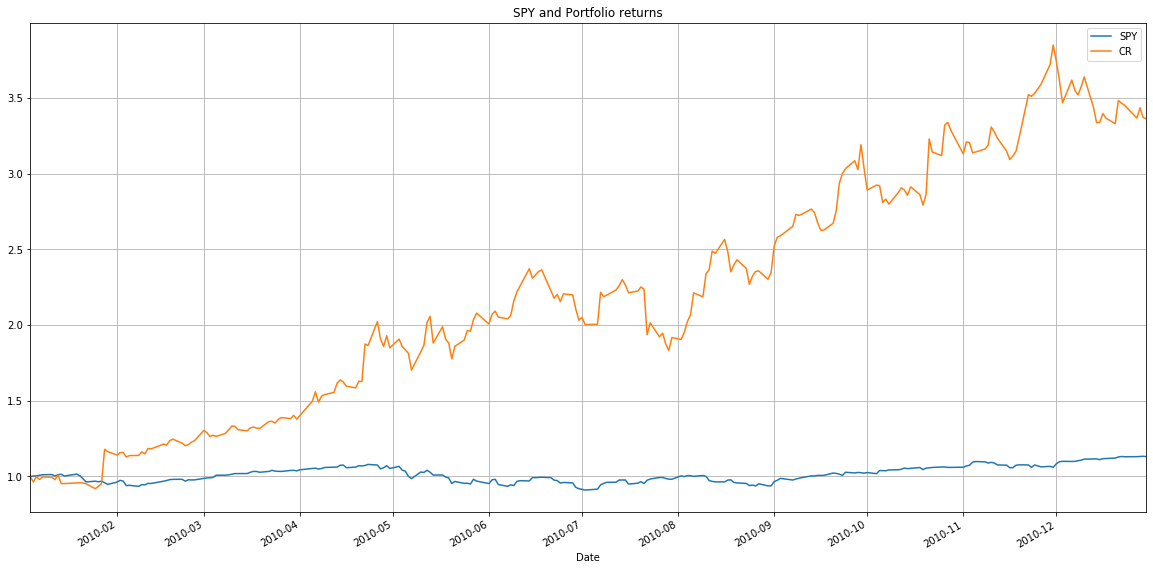

In [18]:
tickers = ['GOOG','AAPL','GLD','XOM','SPY','MSFT','IBM','NFLX','ABMD','AVGO','CMG']
# tickers = ['CMG']
tickers = ["NFLX","MSFT"]

allocs, cr, adr, sddr, sr = \
   optimize_portfolio(start_date=dt.datetime(2010,1,1), end_date=dt.datetime(2010,12,31), \
   tickers=tickers, gen_plot=True)

Print allocations across portfolio

In [19]:
for alloc,tick in zip(allocs,tickers):
    print("{}: {}%".format(tick,round(float(alloc*100),2)))

NFLX: 100.0%
MSFT: 0.0%
